In [1]:
import os

dataset_path = r'/kaggle/input/wound-classification/Wound_dataset copy'

print("Files in dataset path:")
print(os.listdir(dataset_path))

Files in dataset path:
['Abrasions', 'Cut', 'Burns', 'Normal', 'Laseration', 'Diabetic Wounds', 'Pressure Wounds', 'Surgical Wounds', 'Bruises', 'Venous Wounds']


In [2]:
import os
from sklearn.model_selection import train_test_split

# Define dataset path
dataset_path = "/kaggle/input/wound-classification/Wound_dataset copy"

# List all classes (subdirectories)
classes = os.listdir(dataset_path)
print("Classes in dataset:", classes)

# Create a list of file paths and their corresponding labels
file_paths = []
labels = []

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for file_name in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, file_name))
            labels.append(class_name)

# Split the data into train and test sets
train_files, test_files, train_labels, test_labels = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42
)

# Print the number of samples in train and test sets
print(f"Number of training samples: {len(train_files)}")
print(f"Number of testing samples: {len(test_files)}")

Classes in dataset: ['Abrasions', 'Cut', 'Burns', 'Normal', 'Laseration', 'Diabetic Wounds', 'Pressure Wounds', 'Surgical Wounds', 'Bruises', 'Venous Wounds']
Number of training samples: 2352
Number of testing samples: 588


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [6]:
def preprocess_image(img):
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))  # Resize to 299x299
    img = img.astype('float32')
    img = preprocess_input(img)
    return img

In [7]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/kaggle/input/wound-classification/Wound_dataset copy"

# Preprocess image
def preprocess_image(img):
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))  # Resize to 299x299
    img = img.astype('float32')
    img = preprocess_input(img)
    return img

# Load and preprocess data
def load_data(data_path):
    data = []
    labels = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:  # Check if the image was loaded successfully
                    img = preprocess_image(img)  # Apply preprocessing to each image
                    data.append(img)
                    labels.append(folder)
    return np.array(data), np.array(labels)

# Load all data
X, y = load_data(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Print shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (2352, 299, 299, 3)
Testing data shape: (588, 299, 299, 3)
Training labels shape: (2352, 10)
Testing labels shape: (588, 10)


In [8]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define dataset path
dataset_path = "/kaggle/input/wound-classification/Wound_dataset copy"

# Preprocess image
def preprocess_image(img):
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))  # Resize to 299x299
    img = img.astype('float32')
    img = preprocess_input(img)
    return img

# Load and preprocess data
def load_data(data_path):
    data = []
    labels = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:  # Check if the image was loaded successfully
                    img = preprocess_image(img)  # Apply preprocessing to each image
                    data.append(img)
                    labels.append(folder)
    return np.array(data), np.array(labels)

# Load all data
X, y = load_data(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Print shapes
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

Training data shape: (2352, 299, 299, 3)
Validation data shape: (588, 299, 299, 3)
Training labels shape: (2352, 10)
Validation labels shape: (588, 10)


In [9]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [10]:
from tensorflow.keras.layers import BatchNormalization
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers[:-10]:  # Fine-tune more layers
    layer.trainable = False
class CustomBatchNormalization(BatchNormalization):
    def get_config(self):
        config = super().get_config()
        config['axis'] = -1  # Explicitly set axis as an integer
        return config

# Replace BatchNormalization in the model with CustomBatchNormalization
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    CustomBatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

# Define dataset path
dataset_path = "/kaggle/input/wound-classification/Wound_dataset copy"

# Preprocess image
def preprocess_image(img):
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))  # Resize to 299x299
    img = img.astype('float32')
    img = preprocess_input(img)
    return img

# Load and preprocess data
def load_data(data_path):
    data = []
    labels = []
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:  # Check if the image was loaded successfully
                    img = preprocess_image(img)  # Apply preprocessing to each image
                    data.append(img)
                    labels.append(folder)
    return np.array(data), np.array(labels)

# Load all data
X, y = load_data(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers[:-10]:  # Fine-tune more layers
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  # Match number of classes
])

# Convert one-hot encoded labels back to integer labels
y_train_int = np.argmax(y_train, axis=1)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_int),  # Unique classes in the training set
    y=y_train_int  # Integer training labels
)
class_weights_dict = dict(enumerate(class_weights))  # Convert to dictionary

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 408ms/step - accuracy: 0.3064 - loss: 2.3141 - val_accuracy: 0.7381 - val_loss: 0.8864 - learning_rate: 1.0000e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.7783 - loss: 0.5510 - val_accuracy: 0.8656 - val_loss: 0.5207 - learning_rate: 1.0000e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.8927 - loss: 0.2495 - val_accuracy: 0.9014 - val_loss: 0.3741 - learning_rate: 1.0000e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.9316 - loss: 0.1508 - val_accuracy: 0.9218 - val_loss: 0.2675 - learning_rate: 1.0000e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 224ms/step - accuracy: 0.9681 - loss: 0.0847 - val_accuracy: 0.9354 - val_loss: 0.2117 - learning_rate: 1.0000e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - accuracy: 0.9814 - loss: 0.0591 - val_accuracy: 0.9490 - val_loss: 0.1712 - learning_rate: 1.0000e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - acc

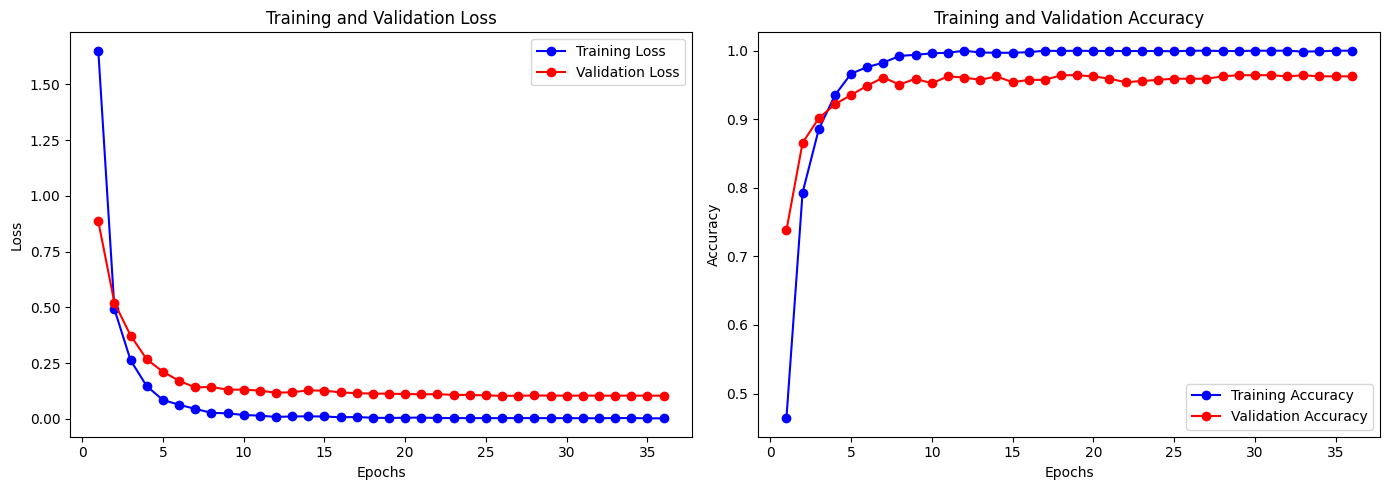

In [12]:
# Extract training and validation loss for visualization
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array representing the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation losses
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Identify false predictions
false_predictions = []

for i in range(len(X_val)):
    if y_pred_classes[i] != y_true_classes[i]:
        false_predictions.append((i, y_true_classes[i], y_pred_classes[i]))

# Display false predictions
print("\nFalse Predictions:")
for idx, true_label, predicted_label in false_predictions:
    print(f"Index: {idx}, True Label: {label_encoder.classes_[true_label]}, Predicted Label: {label_encoder.classes_[predicted_label]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step
                 precision    recall  f1-score   support

      Abrasions       0.94      0.97      0.95        30
        Bruises       0.98      0.93      0.95        56
          Burns       0.88      0.88      0.88        25
            Cut       1.00      0.96      0.98        28
Diabetic Wounds       0.95      0.95      0.95        87
     Laseration       0.91      1.00      0.95        21
         Normal       0.98      0.98      0.98        52
Pressure Wounds       0.95      0.97      0.96       109
Surgical Wounds       0.96      0.95      0.96        82
  Venous Wounds       0.98      0.97      0.97        98

       accuracy                           0.96       588
      macro avg       0.95      0.96      0.95       588
   weighted avg       0.96      0.96      0.96       588


False Predictions:
Index: 30, True Label: Surgical Wounds, Predicted Label: Diabetic Wounds
Index: 83, True Label: Surgical Wounds, Predicted Label: Laserati

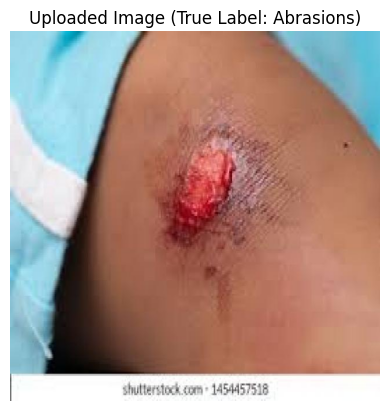

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
True Label: Abrasions
Predicted Label: Abrasions


In [14]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    # Convert BGR to RGB for consistency
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to match the model's input size (299, 299 for ResNet)
    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = preprocess_input(img)  # Use preprocess_input based on the model
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-classification/Wound_dataset copy/Abrasions/abrasions (10).jpg'
img = cv2.imread(img_path)

# Extract the true label from the image path
true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img = preprocess_image(img)  # Apply preprocessing function
    img = np.expand_dims(img, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_label = le.classes_[predicted_class_index]

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

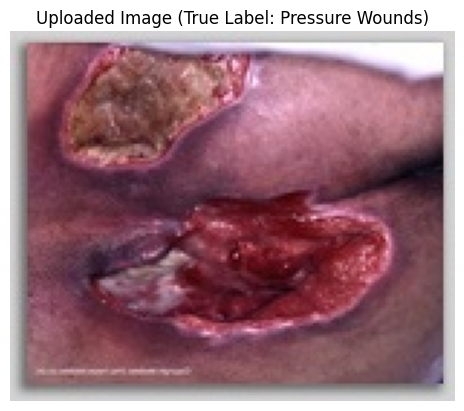

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
True Label: Pressure Wounds
Predicted Label: Pressure Wounds


In [15]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Define and fit LabelEncoder on the labels
le = LabelEncoder()
le.fit(y)  # y is the original labels of the dataset

# Function to preprocess the image
def preprocess_image(img):
    # Convert BGR to RGB for consistency
    if img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to match the model's input size (299, 299 for ResNet)
    img = cv2.resize(img, (299, 299))
    img = img.astype('float32')
    img = preprocess_input(img)  # Use preprocess_input based on the model
    return img

# Specify the image file path (replace with your image file path)
img_path = r'/kaggle/input/wound-classification/Wound_dataset copy/Pressure Wounds/mirrored_sloughy-pressure-ulcer-0038.jpg'
img = cv2.imread(img_path)

# Extract the true label from the image path
true_label = img_path.split('/')[-2]  # Assumes the folder name is the true label

# Check if the image was successfully loaded
if img is None:
    print(f"Error: Unable to load the image at {img_path}")
else:
    # Display the uploaded image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    plt.axis('off')  # Hide axis
    plt.title(f"Uploaded Image (True Label: {true_label})")
    plt.show()

    # Preprocess the image and make a prediction
    img = preprocess_image(img)  # Apply preprocessing function
    img = np.expand_dims(img, axis=0)  # Add batch dimension for prediction

    # Make a prediction
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_label = le.classes_[predicted_class_index]

    # Print the true label and predicted label
    print(f'True Label: {true_label}')
    print(f'Predicted Label: {predicted_label}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


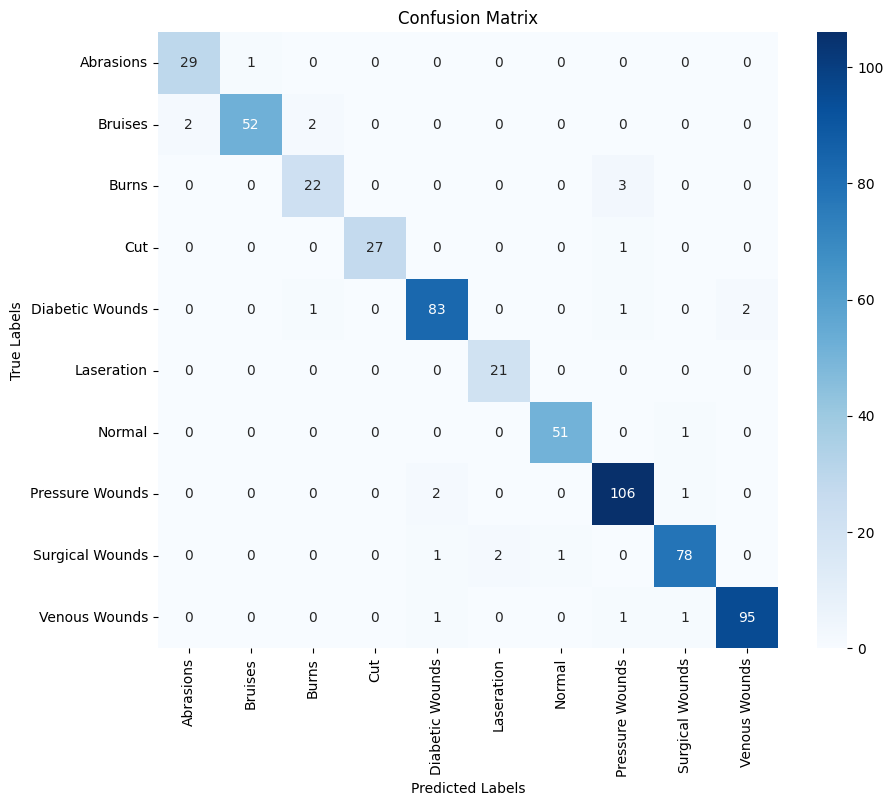

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices

# Convert one-hot encoded validation labels to class indices
y_true_classes = np.argmax(y_val, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Save the model in .h5 format
model.save('Collected and Categorized Wound Images.h5')
print("Model saved as 'Collected and Categorized Wound Images.h5'")

Model saved as 'Collected and Categorized Wound Images.h5'
